In [1]:
# Imports

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import torch 
import torch.nn as nn
import torchvision
import torchvision.models as models
import torchvision.transforms as TT

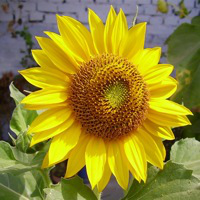

In [2]:
im_org = Image.open("example_image.jpg")
im_org

In [4]:
# Convert to Torch Tensor

trans = TT.ToTensor()
im = trans(im_org)
im.shape

torch.Size([3, 200, 200])

In [21]:
# Example Convnet: Pre-trained Alexnet

def load_model():
    model = models.alexnet(pretrained=True)
    return model

convnet = load_model()
convnet.features

Sequential(
  (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
  (1): ReLU(inplace=True)
  (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (4): ReLU(inplace=True)
  (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (7): ReLU(inplace=True)
  (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (9): ReLU(inplace=True)
  (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
)

# Activation Visualization

This part shows the output (activation) of the certain layer when an image is fed. You can change the figure properties at the end of next cell to visualize more layers, display more activations etc.

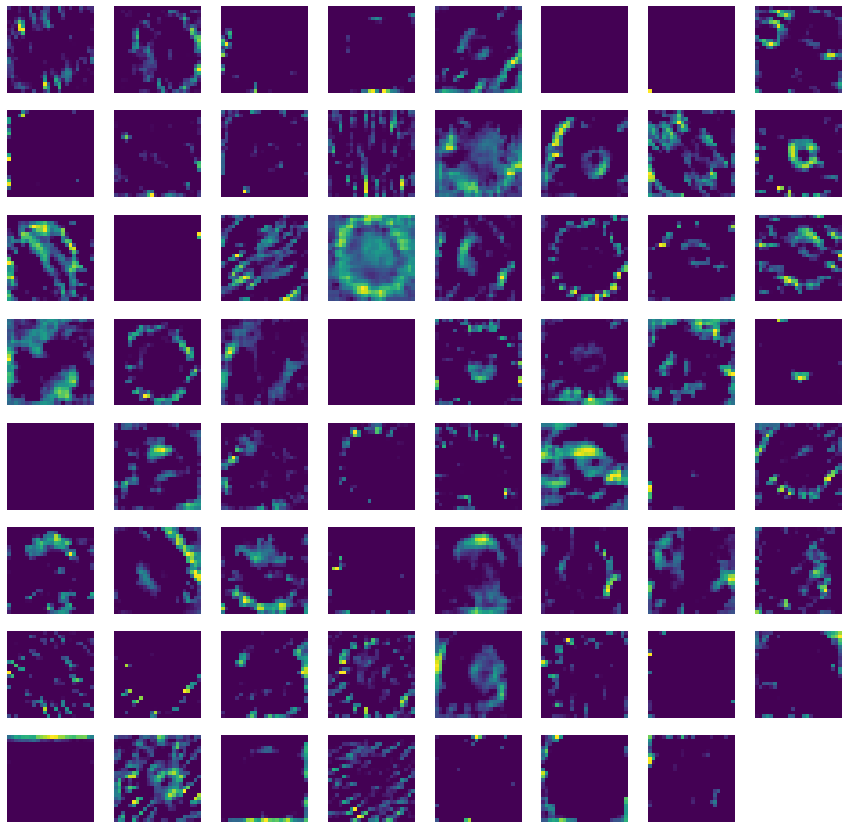

In [25]:
model = load_model() # Load the pre-trained model

activation = {} 
layer_number = 3 # Decides which layer to visualize

# Detach function to get activation and store it
def get_activation(name):
    def hook(model, input, output):
        activation[name] = output.detach()
    return hook

# Get the corresponding activation map
model.features[layer_number].register_forward_hook(get_activation('the_activation'))

# Take the example image and unsqueeze it to get number of channels
data = im
data = data.unsqueeze(0)

# Feed the image to the Convnet
output = model(data)

# Get the activation of the selected layer 
act = activation['the_activation'].squeeze()

# Visualize
w=10
h=10
fig=plt.figure(figsize=(15, 15))
columns = 8
rows = 8
for i in range(1, columns*rows):
    img = act[i,:,:]
    fig.add_subplot(rows, columns, i)
    plt.axis('off')
    plt.imshow(img)

plt.show()

# Kernel Visualization

This part visualizes the kernels of the desired layer. Intuitively, kernel corresponds to understood features. For example in earlier layers, CNN extracts lines and similar low-level features and the kernels get more detailed while we go into deeper layers. 

In [61]:
# To-be-implemented